### Introduction

This notebook is the analysis of Hotel reviews as a part of test given by FoodHUB. Using this data I'm going to find the insightful metrics and look which hotel are most popular based on rating and which one needs more improvement in its service.

In [334]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams['font.size'] = 14

In [2]:
# Loading the Hotel Review dataset
hotel_reviews = pd.read_csv('Hotel_Reviews.csv')

In [333]:
# Total number of reviews in the data
len(hotel_reviews)

515738

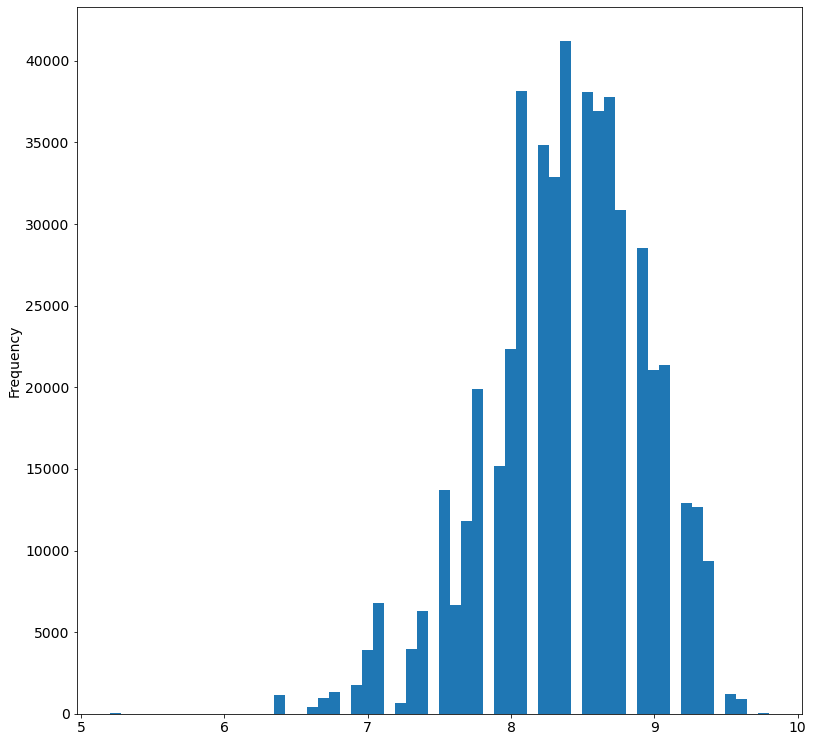

In [332]:
# Distribution of Average Score rating
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams['font.size'] = 14
hotel_reviews.Average_Score.plot(kind='hist',bins=60,figsize=(13,13))
plt.show()

we can see average score is usually between 7.9 and 9.1 So if we want work on any analysis using this data best results will come out taking data between 7.9 and lower then 9.1

## Lets find the Top 10 Hotels based on rating

The below will give us the top 10 hotels which have high Average rating given reviewers

In [110]:
hotel_reviews[hotel_reviews.Average_Score >= 5.][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(
    by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
54717,Ritz Paris,9.8,122
402244,H10 Casa Mimosa 4 Sup,9.6,454
185602,41,9.6,244
398945,Hotel The Serras,9.6,604
176997,H tel de La Tamise Esprit de France,9.6,166
316447,Hotel Casa Camper,9.6,732
14708,Haymarket Hotel,9.6,255
390999,Ham Yard Hotel,9.5,314
312809,Mercer Hotel Barcelona,9.5,362
81101,Le Narcisse Blanc Spa,9.5,222


<b> But if we observe, though the Average Score for above hotels is high the total number of reviews for a hotel is way less than the average number of reviews a hotel will have. Lets see </b>

In [113]:
hotel_reviews[['Hotel_Name','Total_Number_of_Reviews']].drop_duplicates()['Total_Number_of_Reviews'].mean()

1297.2222222222222

The average number of reviews for hotel is around <b>1297</b>. So lets consider the hotels which are having atleast 1000 reviews for the analysis

In [116]:
hotel_reviews_new = hotel_reviews[hotel_reviews.Total_Number_of_Reviews > 1000]

In [118]:
Top_10_hotels = hotel_reviews_new[hotel_reviews_new.Average_Score >= 5.][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(
    by ='Average_Score',ascending = False)[:10]

In [205]:
Top_10_hotels

,Hotel_Name,Average_Score,Total_Number_of_Reviews
433203,Catalonia Square 4 Sup,9.4,1711
147504,Shangri La Hotel at The Shard London,9.4,2200
331922,Hotel Palace GL,9.4,1266
14829,Intercontinental London The O2,9.4,4204
122627,Rosewood London,9.4,1008
462866,The Savoy,9.4,1021
406063,Excelsior Hotel Gallia Luxury Collection Hotel,9.4,1345
324569,Best Western Premier Kaiserhof Wien,9.4,1353
372994,Catalonia Magdalenes,9.4,1108
417387,The Langham London,9.3,1276


These are the top 10 rated Hotels 

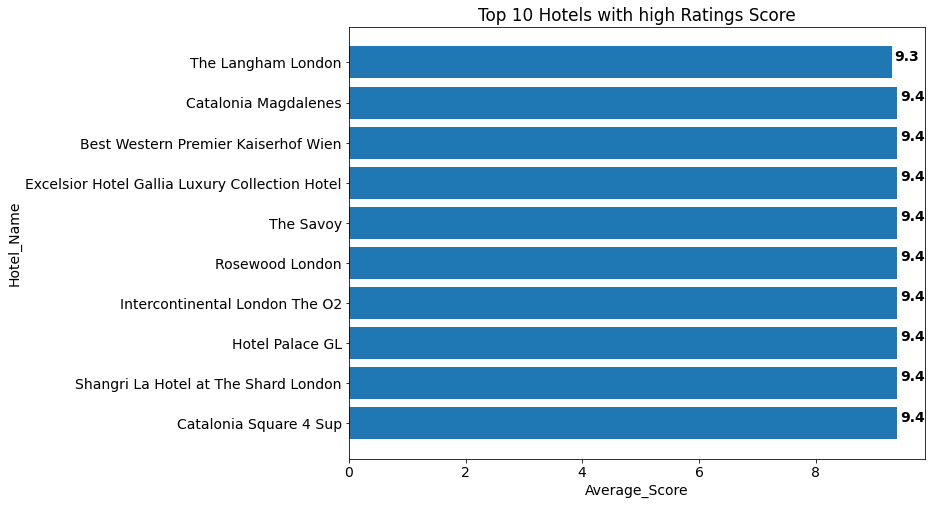

In [327]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14

plt.xlabel('Average_Score')
plt.ylabel("Hotel_Name")

plt.barh(Top_10_hotels.Hotel_Name,Top_10_hotels.Average_Score)
# plt.xticks(rotation=90)
plt.title('Top 10 Hotels with high Ratings Score')

for index, value in enumerate(Top_10_hotels.Average_Score):
    plt.text(x=value + .05,y=index+0.05, s=round(value, 2), weight='bold')
    
plt.show()

## Find the Top 10 Low rated Hotels 

Firstly, lets categorize the reviewers based on their rating as below


| **Reviewer Type**  | **Score**          | 
| -------------  | ---------------| 
| **Promoter**  | **9 or 10** | 
| **Passive**   | **7 or 8** |
| **Detractor** | **0 to 6** |

In [36]:
hotel_reviews.loc[hotel_reviews.Reviewer_Score >= 9, 'Reviewer_Type'] = 'Promoter'
hotel_reviews.loc[hotel_reviews.Reviewer_Score < 9 , 'Reviewer_Type'] = 'Passive'
hotel_reviews.loc[hotel_reviews.Reviewer_Score < 7 , 'Reviewer_Type'] = 'Detractor'

As we saw in earlier case, consider the hotels with average number of ratings more than **1000** will give us appropriate results as hotels with low number of ratings will have high variance

In [220]:
hotel_reviews_new = hotel_reviews[hotel_reviews.Total_Number_of_Reviews > 1000]

**Now get the information of the percentage of low ratings out of total number of ratings given to hotel as below**

In [315]:
review_count_df_by_Type = hotel_reviews_new.groupby(['Hotel_Name','Reviewer_Type']).agg({'Reviewer_Score':'count'}).reset_index().rename(columns={'Reviewer_Score':'count_of_reviews'})
review_count_df_by_hotel = hotel_reviews_new.groupby(['Hotel_Name']).agg({'Reviewer_Score':'count'}).reset_index().rename(columns={'Reviewer_Score':'tot_count_of_reviews'})
review_count_df_by_Type = review_count_df_by_Type.merge(review_count_df_by_hotel, on=['Hotel_Name'],how='left')
review_count_df_by_Type['Pct_of_reviews'] = (review_count_df_by_Type['count_of_reviews'] / review_count_df_by_Type['tot_count_of_reviews'])*100
review_count_df_by_Type = review_count_df_by_Type[review_count_df_by_Type.Reviewer_Type == 'Detractor'].sort_values('tot_count_of_reviews',ascending=False)[0:20]
review_count_df_by_Type = review_count_df_by_Type.sort_values('Pct_of_reviews',ascending=False)
review_count_df_by_Type[:10]

,Hotel_Name,Reviewer_Type,count_of_reviews,tot_count_of_reviews,Pct_of_reviews
279,Britannia International Hotel Canary Wharf,Detractor,2277,4789,47.546461
720,Hilton London Metropole,Detractor,1015,2628,38.622527
591,Grand Royale London Hyde Park,Detractor,932,2958,31.507776
1245,Millennium Gloucester Hotel London,Detractor,770,2565,30.019493
756,Holiday Inn London Kensington,Detractor,805,2768,29.082370
867,Hotel Da Vinci,Detractor,491,1877,26.158764
453,DoubleTree by Hilton London Docklands Riverside,Detractor,499,2147,23.241733
1452,Park Grand Paddington Court,Detractor,462,2288,20.192308
1470,Park Plaza London Riverbank,Detractor,425,2167,19.612367
1719,Strand Palace Hotel,Detractor,829,4256,19.478383


The below Bar Graph gives the Hotel list which are having more percentage of low rating which were given to them.

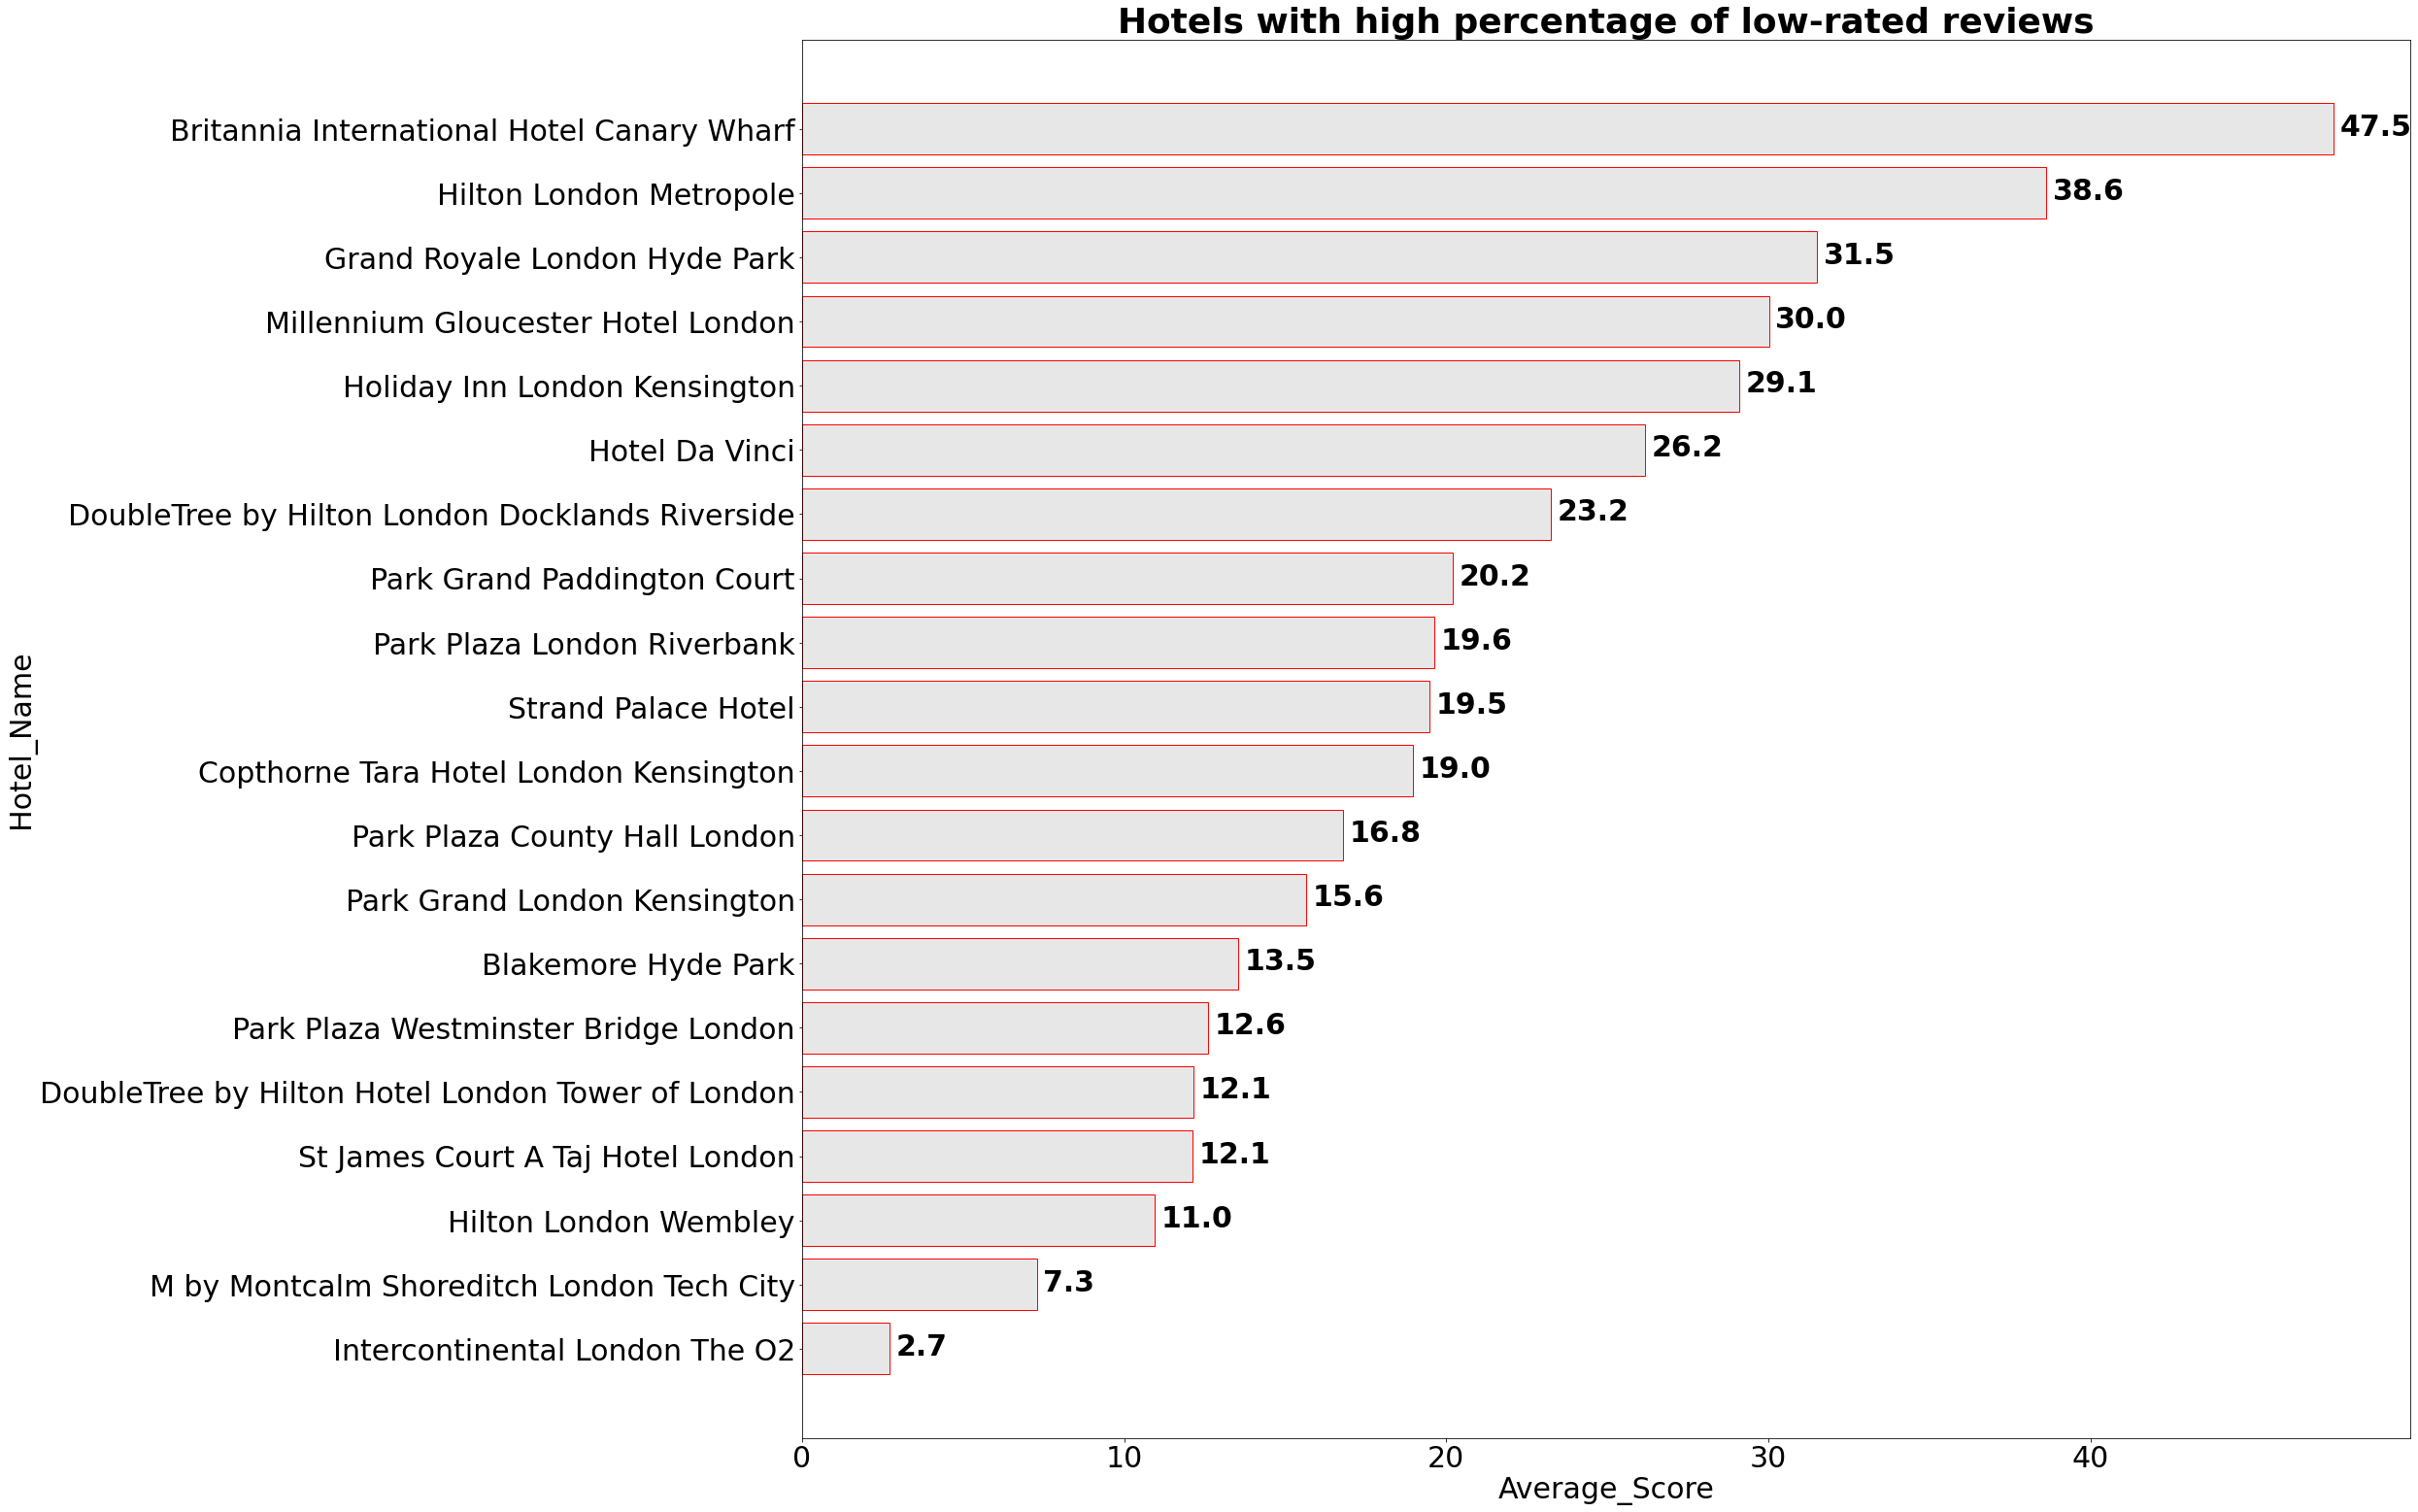

In [338]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.rcParams['figure.figsize'] = (23,20)
plt.rcParams['font.size'] = 30

plt.xlabel('Average_Score')
plt.ylabel("Hotel_Name")
review_count_df_by_Type.sort_values('Pct_of_reviews',inplace=True)
plt.barh(review_count_df_by_Type.Hotel_Name,review_count_df_by_Type.Pct_of_reviews,color=(0.1,0.1,0.1,0.1),edgecolor='red')
# plt.xticks(rotation=90)
plt.title('Hotels with high percentage of low-rated reviews',color='black',weight='bold')

for index, value in enumerate(review_count_df_by_Type.Pct_of_reviews):
    plt.text(x=value + .2,y=index - 0.1, s=round(value, 1), weight='bold')
    
plt.show()

In Conclusion, the hotel **Britannia International Hotel Canary Wharf** has **high percentage of low rating** which tells us that this particular hotel need a immediate attention and take necessary action based on the negative reviews

Thank you

**Manjunath** 